In [1]:
%pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from pycaret.classification import *

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Train Data & Model Evaluation

In [8]:
dataset_path = '/content/drive/MyDrive/8101 Customer Analytics/HDI_Segment_v2.csv'
cluster_results = pd.read_csv(dataset_path)

In [9]:
# Columns to drop
columns_to_drop_cluster_results = ['Total_Quantity_offline', 'Total_Quantity_online', 'Avg_Quantity_per_Purchase_offline',
                   'Avg_Quantity_per_Purchase_online', 'Unique_Items_offline', 'Unique_Items_online',
                   'Purchase_Frequency_offline', 'Purchase_Frequency_online','Total_Amount_offline','Total_Amount_online',
                   'Avg_Ticket_offline','Avg_Ticket_online']

In [12]:
# Drop the columns
#cluster_results = cluster_results.drop(columns=columns_to_drop_cluster_results).fillna(0)

In [13]:
# Drop the original 'Most_Purchased_Category' column
cluster_results = cluster_results.drop('Most_Purchased_Category', axis=1)

In [10]:
cluster_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48888 entries, 0 to 48887
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ent                           48888 non-null  object 
 1   Total_Quantity                48888 non-null  int64  
 2   Avg_Quantity_per_Purchase     48888 non-null  float64
 3   Unique_Items                  48888 non-null  int64  
 4   Purchase_Frequency            48888 non-null  int64  
 5   Most_Purchased_Category       48888 non-null  object 
 6   Recency_Last_Purchase         48888 non-null  int64  
 7   Avg_Spend_per_Transaction     48888 non-null  float64
 8   %_Total_Qty_offline           48888 non-null  float64
 9   %_Total_Qty_online            48888 non-null  float64
 10  %_unique_items_offline        48888 non-null  float64
 11  %_unique_items_online         48888 non-null  float64
 12  %_purchase_frequency_offline  48888 non-null  float64
 13  %

In [14]:
cluster_sizes = cluster_results['Clusters'].value_counts()
single_member_clusters = cluster_sizes[cluster_sizes == 1].index
print("Single member clusters: ", single_member_clusters)

Single member clusters:  Int64Index([], dtype='int64')


In [15]:
#cluster_results = cluster_results[cluster_results['Clusters'] != 3]

In [16]:
classification_experiment = setup(cluster_results, target = 'Clusters', session_id = 158)

,Description,Value
0,Session id,158
1,Target,Clusters
2,Target type,Multiclass
3,Original data shape,"(48888, 36)"
4,Transformed data shape,"(48888, 36)"
5,Transformed train set shape,"(34221, 36)"
6,Transformed test set shape,"(14667, 36)"
7,Numeric features,34
8,Categorical features,1
9,Preprocess,True


In [17]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7900,0.0000,0.7900,0.6452,0.7098,0.6467,0.6819,1.0710
et,Extra Trees Classifier,0.7413,0.9793,0.7413,0.8198,0.6847,0.5661,0.6173,3.1660
knn,K Neighbors Classifier,0.6585,0.8040,0.6585,0.6587,0.6583,0.4613,0.4615,3.4110
lr,Logistic Regression,0.5583,0.7122,0.5583,0.5592,0.5472,0.3120,0.3195,2.8670
rf,Random Forest Classifier,0.5232,0.9345,0.5232,0.5933,0.4375,0.2132,0.2884,4.9200
nb,Naive Bayes,0.5226,0.7317,0.5226,0.5563,0.4366,0.2370,0.3189,0.8360
svm,SVM - Linear Kernel,0.5042,0.0000,0.5042,0.5265,0.4193,0.2164,0.2790,2.7020
xgboost,Extreme Gradient Boosting,0.4446,0.8917,0.4446,0.4067,0.3115,0.0726,0.1405,8.9750
gbc,Gradient Boosting Classifier,0.4093,0.8213,0.4093,0.1681,0.2380,0.0033,0.0467,45.3370
lightgbm,Light Gradient Boosting Machine,0.4093,0.8571,0.4093,0.1680,0.2380,0.0035,0.0458,4.0860


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [18]:
# Analyze Model
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [19]:
predictions = predict_model(best, data=cluster_results.iloc[:, :-1])
predictions.head()

,ent,Total_Quantity,Avg_Quantity_per_Purchase,Unique_Items,Purchase_Frequency,Recency_Last_Purchase,Avg_Spend_per_Transaction,%_Total_Qty_offline,%_Total_Qty_online,%_unique_items_offline,...,Status_M,Status_N,Status_O,no_downline,Total_Amount,Avg_Ticket,%_Total_Amount_offline,%_Total_Amount_online,CLV,prediction_label
0,BC11JW3U,15,1.150000,11,10,78,1.500000,0.000008,0.000005,0.727273,...,0,0,0,41,4579000.0,4.005000e+05,0.407513,0.592487,64106000.0,3
1,BCCCCREW3WY,4,1.250000,3,2,19,2.000000,0.000001,0.000002,0.666667,...,0,0,0,11,2567500.0,1.033125e+06,0.610516,0.389484,0.0,0
2,BCCCCREWJZ5,2,2.000000,1,1,106,2.000000,0.000001,0.000000,1.000000,...,0,0,0,1,1170000.0,1.170000e+06,1.000000,0.000000,0.0,0
3,BCCCCREWQQ7,3,1.500000,2,1,16,3.000000,0.000002,0.000000,1.000000,...,0,0,0,6,1729000.0,1.729000e+06,1.000000,0.000000,0.0,0
4,BCE1JRRP,14,1.416667,6,6,59,2.333333,0.000007,0.000005,0.833333,...,0,0,0,102,5429000.0,9.048333e+05,0.734021,0.265979,92293000.0,3


#Test Data

In [20]:
data = '/content/drive/MyDrive/Item dataset/Item_sold_filtered_2022.csv'
data = pd.read_csv(data)

## Member

In [21]:
member = '/content/drive/MyDrive/Original/data member.xlsx'
member = pd.read_excel(member)
member.head()

,ent,original_status,join_month,join_year,sponsor
0,UCC4CC4F,-,5,2014,8844CQCEY
1,UCC4CCEK,-,5,2014,8844CQCCU
2,UCC4CC15,-,5,2014,8844CQCEY
3,UCC4CCR2,-,5,2014,8844CQCEY
4,UCC4CCJP,-,5,2014,8844CQCEY


In [22]:
# Assuming your data is stored in a DataFrame called 'df'
distinct_count = member.groupby('sponsor')['ent'].nunique()

# Create a new DataFrame with the desired column names
downline = pd.DataFrame({'ent': distinct_count.index, 'no_downline': distinct_count.values})

downline

,ent,no_downline
0,8841C13JF,1
1,8841C14C5,1
2,8841C14ZF,4
3,8841C1C1U,1
4,8841C1C3F,1
...,...,...
116242,UCC4RW1B,3
116243,UCC4RW40,2
116244,UCC4RWRY,1
116245,UCC4RWZ5,1


In [23]:
# Replace join years before 1986 with 1986
member.loc[member['join_year'] < 1986, 'join_year'] = 1986

# Calculate the lifetime
current_year = 2022
member['lifetime'] = current_year - member['join_year']

# Perform one-hot encoding on 'original_status'
one_hot_encoded = pd.get_dummies(member['original_status'], prefix='Status')

# Concatenate the one-hot encoded columns with the original DataFrame
member = pd.concat([member, one_hot_encoded], axis=1)

In [24]:
# Columns to drop
member_to_drop = ['original_status','join_month','join_year','sponsor'] #'Total_Amount','Avg_Amount_per_Purchase'

# Drop the columns
member = member.drop(columns=member_to_drop).fillna(0)
member.tail()

,ent,lifetime,Status_-,Status_A,Status_B,Status_C,Status_D,Status_E,Status_F,Status_H,Status_I,Status_J,Status_K,Status_L,Status_M,Status_N,Status_O
590560,H3CCC43B,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
590561,H3CCC4ZY,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
590562,H3CCCEC7,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
590563,H3CCCE4I,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
590564,H3CCCEEF,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
member = member.merge(downline, on='ent')

In [26]:
member

,ent,lifetime,Status_-,Status_A,Status_B,Status_C,Status_D,Status_E,Status_F,Status_H,Status_I,Status_J,Status_K,Status_L,Status_M,Status_N,Status_O,no_downline
0,UCC4CC4F,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,UCC4CC15,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,UCC4CCJP,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,UCC4CCQ0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,UCC4CC3B,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116241,H3CCC415,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4
116242,H3CCC4R2,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2
116243,H3CCC4JP,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
116244,H3CCC4WU,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


##Customer Value

In [27]:
value = '/content/drive/MyDrive/Original/transaction 2021.xlsx'
value = pd.read_excel(value)
# Calculate Total Amount Spent per Customer (assuming no price column is available)
total_amount = value.groupby('ent')['total_amount'].sum()  # Assuming the quantity sold represents the amount spent

# Calculate Average Amount per Purchase per Customer
avg_amount_per_purchase = value.groupby(['ent', 'payment_date'])['total_amount'].mean().groupby('ent').mean()

In [28]:
# Create a new DataFrame for customer segmentation
customer_value = pd.DataFrame({
    'Total_Amount': total_amount,
    'Avg_Ticket': avg_amount_per_purchase,
})

In [29]:
customer_value = customer_value.reset_index()

In [30]:
# Calculate Total Amount Spent per Customer (assuming no price column is available)
total_amount = value.groupby(['ent', 'trans_origin_type'])['total_amount'].sum()  # Assuming the quantity sold represents the amount spent

# Calculate Average amount per Purchase per Customer
avg_amount_per_purchase = value.groupby(['ent', 'trans_origin_type', 'payment_date'])['total_amount'].mean().groupby(['ent', 'trans_origin_type']).mean()

# Calculate Proportion of Total Amount by Channel
proportion_total_Amount = total_amount / value.groupby('ent')['total_amount'].sum()

# Calculate Proportion of Total Amount by Channel
proportion_total_ticket = avg_amount_per_purchase / value.groupby(['ent', 'payment_date'])['total_amount'].mean().groupby('ent').mean()

In [31]:
# Create a new DataFrame for customer segmentation by channel
value_channel = pd.DataFrame({
    'Total_Amount': total_amount,
    'Avg_Ticket': avg_amount_per_purchase,
    '%_Total_Amount': proportion_total_Amount,
    #'%_Avg_ticket': proportion_total_ticket
})

In [32]:
value_channel = value_channel.reset_index()

In [33]:
# Pivot the DataFrame by 'Channel'
pivoted_value = value_channel.pivot(index='ent', columns='trans_origin_type')

# Flatten the MultiIndex column names
pivoted_value.columns = [f'{col[0]}_{col[1]}' for col in pivoted_value.columns]

# Reset the index
pivoted_value = pivoted_value.reset_index()

# Print the pivoted DataFrame
pivoted_value.tail()

,ent,Total_Amount_offline,Total_Amount_online,Avg_Ticket_offline,Avg_Ticket_online,%_Total_Amount_offline,%_Total_Amount_online
325622,TZZZJ3WP,15735000.0,6772000.0,1.066786e+06,1354400.0,0.699116,0.300884
325623,TZZZJZ4Y,1283000.0,NaN,6.415000e+05,NaN,1.000000,NaN
325624,TZZZREZF,7663000.0,NaN,5.346538e+05,NaN,1.000000,NaN
325625,TZZZW417,50000.0,NaN,5.000000e+04,NaN,1.000000,NaN
325626,TZZZZEZ0,10031000.0,5546000.0,7.459583e+05,1386500.0,0.643962,0.356038


In [34]:
merged_value = customer_value.merge(pivoted_value, on='ent')
merged_value

,ent,Total_Amount,Avg_Ticket,Total_Amount_offline,Total_Amount_online,Avg_Ticket_offline,Avg_Ticket_online,%_Total_Amount_offline,%_Total_Amount_online
0,8C4ECCCCC3Y,823000.0,4.115000e+05,50000.0,773000.0,5.000000e+04,773000.0,0.060753,0.939247
1,8CCCCCC4R1F,3798000.0,1.899000e+06,NaN,3798000.0,NaN,1899000.0,NaN,1.000000
2,BC11JW3U,4579000.0,4.005000e+05,1866000.0,2713000.0,2.332500e+05,1069500.0,0.407513,0.592487
3,BCCCCRE3CZY,410000.0,4.100000e+05,410000.0,NaN,4.100000e+05,NaN,1.000000,NaN
4,BCCCCREW3WY,2567500.0,1.033125e+06,1567500.0,1000000.0,7.837500e+05,1000000.0,0.610516,0.389484
...,...,...,...,...,...,...,...,...,...
325622,TZZZJ3WP,22507000.0,1.142474e+06,15735000.0,6772000.0,1.066786e+06,1354400.0,0.699116,0.300884
325623,TZZZJZ4Y,1283000.0,6.415000e+05,1283000.0,NaN,6.415000e+05,NaN,1.000000,NaN
325624,TZZZREZF,7663000.0,5.346538e+05,7663000.0,NaN,5.346538e+05,NaN,1.000000,NaN
325625,TZZZW417,50000.0,5.000000e+04,50000.0,NaN,5.000000e+04,NaN,1.000000,NaN


## Behaviour

In [35]:
max = pd.to_datetime(data['Payment_Date']).max()
max

Timestamp('2022-12-30 00:00:00+0000', tz='UTC')

In [36]:
# Calculate Total Quantity Purchased per Customer
total_quantity = data.groupby('ent')['Qty sold'].sum()

# Calculate Average Quantity per Purchase per Customer
avg_quantity_per_purchase = data.groupby(['ent', 'Payment_Date'])['Qty sold'].mean().groupby('ent').mean()

# Calculate Number of Unique Items Purchased per Customer
unique_items = data.groupby('ent')['Sold_product'].nunique()

# Calculate Purchase Frequency per Customer
purchase_frequency = data.groupby('ent')['Payment_Date'].nunique()

# Determine Most Purchased Item Category per Customer
most_purchased_category = data.groupby('ent')['Sold_product'].apply(lambda x: x.value_counts().index[0])

# Calculate Proportion of Purchases by Category per Customer
proportion_by_category = data.groupby(['ent', 'Sold_product']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Calculate Recency of Last Purchase per Customer
# recency_last_purchase = pd.to_datetime(data.groupby('ent')['Payment_Date'].max())
recency_last_purchase = (max - pd.to_datetime(data.groupby('ent')['Payment_Date'].max())).dt.days

# Calculate Average Spend per Transaction per Customer
avg_spend_per_transaction = total_quantity / purchase_frequency

In [37]:
# Calculate Total Quantity Purchased per Customer
total_quantity_Channel = data.groupby(['ent', 'Channel'])['Qty sold'].sum()
total_quantity_Channel

ent          Channel
884R4EJZ0    online      1
884RC4REI    online      4
8C4ECCCC44F  online      1
8CC1CCCC3E0  online      1
8CCCCCC4R1F  online     13
                        ..
TZZZJ3WP     online     60
TZZZREZF     offline    18
             online      7
TZZZZEZ0     offline    33
             online     65
Name: Qty sold, Length: 336569, dtype: int64

In [38]:
# Create a new DataFrame for customer segmentation
customer_segmentation = pd.DataFrame({
    'Total_Quantity': total_quantity,
    #'Total_Amount': total_amount,
    'Avg_Quantity_per_Purchase': avg_quantity_per_purchase,
    #'Avg_Amount_per_Purchase': avg_amount_per_purchase,
    'Unique_Items': unique_items,
    'Purchase_Frequency': purchase_frequency,
    'Most_Purchased_Category': most_purchased_category,
    'Recency_Last_Purchase': recency_last_purchase,
    'Avg_Spend_per_Transaction': avg_spend_per_transaction
})



## By Channel

In [39]:
# Calculate Total Quantity Purchased per Customer
total_quantity = data.groupby(['ent', 'Channel'])['Qty sold'].sum()

# Calculate Total Amount Spent per Customer (assuming no price column is available)
# total_amount = data.groupby(['ent', 'Channel'])['Qty sold'].sum()  # Assuming the quantity sold represents the amount spent

# Calculate Average Quantity per Purchase per Customer
avg_quantity_per_purchase = data.groupby(['ent', 'Channel', 'Payment_Date'])['Qty sold'].mean().groupby(['ent', 'Channel']).mean()

# Calculate Average Amount per Purchase per Customer
# avg_amount_per_purchase = avg_quantity_per_purchase  # Assuming quantity sold represents the amount spent

# Calculate Number of Unique Items Purchased per Customer
unique_items = data.groupby(['ent', 'Channel'])['Sold_product'].nunique()

# Calculate Purchase Frequency per Customer
purchase_frequency = data.groupby(['ent', 'Channel'])['Payment_Date'].nunique()

# Calculate Proportion of Total Amount by Channel
proportion_total_quantity = total_quantity / data.groupby('Channel')['Qty sold'].sum()

# Calculate Proportion of Avg_Quantity_per_Purchase
proportion_Avg_Quantity_per_Purchase = avg_quantity_per_purchase / data.groupby(['ent', 'Payment_Date'])['Qty sold'].mean().groupby('ent').mean()

# Calculate Proportion of unique_items
proportion_unique_items = unique_items / data.groupby('ent')['Sold_product'].nunique()

# Calculate Proportion of purchase_frequency
proportion_purchase_frequency = purchase_frequency / data.groupby('ent')['Payment_Date'].nunique()

# Create a new DataFrame for customer segmentation by channel
customer_segmentation_channel = pd.DataFrame({
    'Total_Quantity': total_quantity,
    #'Total_Amount': total_amount,
    'Avg_Quantity_per_Purchase': avg_quantity_per_purchase,
    #'Avg_Amount_per_Purchase': avg_amount_per_purchase,
    'Unique_Items': unique_items,
    'Purchase_Frequency': purchase_frequency,
    '%_Total_Qty': proportion_total_quantity,
    #'%_Avg_Quantity_per_Purchase': proportion_Avg_Quantity_per_Purchase,
    '%_unique_items' : proportion_unique_items,
    '%_purchase_frequency' : proportion_purchase_frequency
})

In [40]:
customer_segmentation_channel = customer_segmentation_channel.reset_index()
customer_segmentation_channel

,ent,Channel,Total_Quantity,Avg_Quantity_per_Purchase,Unique_Items,Purchase_Frequency,%_Total_Qty,%_unique_items,%_purchase_frequency
0,884R4EJZ0,online,1,1.000000,1,1,6.531393e-07,1.000000,1.000000
1,884RC4REI,online,4,1.000000,4,2,2.612557e-06,1.000000,1.000000
2,8C4ECCCC44F,online,1,1.000000,1,1,6.531393e-07,1.000000,1.000000
3,8CC1CCCC3E0,online,1,1.000000,1,1,6.531393e-07,1.000000,1.000000
4,8CCCCCC4R1F,online,13,1.583333,5,3,8.490811e-06,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...
336564,TZZZJ3WP,online,60,1.472222,32,21,3.918836e-05,0.695652,0.636364
336565,TZZZREZF,offline,18,1.076923,10,13,1.531843e-05,0.909091,1.000000
336566,TZZZREZF,online,7,1.750000,4,1,4.571975e-06,0.363636,0.076923
336567,TZZZZEZ0,offline,33,1.235714,14,14,2.808379e-05,0.482759,0.424242


In [41]:
# Pivot the DataFrame by 'Channel'
pivoted_df = customer_segmentation_channel.pivot(index='ent', columns='Channel')

# Flatten the MultiIndex column names
pivoted_df.columns = [f'{col[0]}_{col[1]}' for col in pivoted_df.columns]

# Reset the index
pivoted_channel = pivoted_df.reset_index()

# Print the pivoted DataFrame
pivoted_channel.tail()

,ent,Total_Quantity_offline,Total_Quantity_online,Avg_Quantity_per_Purchase_offline,Avg_Quantity_per_Purchase_online,Unique_Items_offline,Unique_Items_online,Purchase_Frequency_offline,Purchase_Frequency_online,%_Total_Qty_offline,%_Total_Qty_online,%_unique_items_offline,%_unique_items_online,%_purchase_frequency_offline,%_purchase_frequency_online
271238,TZZZEQ4Y,NaN,4.0,NaN,1.000000,NaN,4.0,NaN,1.0,NaN,0.000003,NaN,1.000000,NaN,1.000000
271239,TZZZEZCP,3.0,NaN,1.000000,NaN,3.0,NaN,2.0,NaN,0.000003,NaN,1.000000,NaN,1.000000,NaN
271240,TZZZJ3WP,39.0,60.0,1.506410,1.472222,18.0,32.0,13.0,21.0,0.000033,0.000039,0.391304,0.695652,0.393939,0.636364
271241,TZZZREZF,18.0,7.0,1.076923,1.750000,10.0,4.0,13.0,1.0,0.000015,0.000005,0.909091,0.363636,1.000000,0.076923
271242,TZZZZEZ0,33.0,65.0,1.235714,1.154135,14.0,22.0,14.0,19.0,0.000028,0.000042,0.482759,0.758621,0.424242,0.575758


In [42]:
customer_segmentation = customer_segmentation.reset_index()
customer_segmentation.tail()

,ent,Total_Quantity,Avg_Quantity_per_Purchase,Unique_Items,Purchase_Frequency,Most_Purchased_Category,Recency_Last_Purchase,Avg_Spend_per_Transaction
271238,TZZZEQ4Y,4,1.000000,4,1,KC4CE4,92,4.000000
271239,TZZZEZCP,3,1.000000,3,2,7C4CC4,7,1.500000
271240,TZZZJ3WP,99,1.497475,46,33,6CQC41,18,3.000000
271241,TZZZREZF,25,1.123077,11,13,KC4CC4,6,1.923077
271242,TZZZZEZ0,98,1.188745,29,33,6CQC41,48,2.969697


## Merge Features

In [43]:
# Merge the DataFrames on 'ent'
merged_df = customer_segmentation.merge(pivoted_df, on='ent')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271243 entries, 0 to 271242
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ent                                271243 non-null  object 
 1   Total_Quantity                     271243 non-null  int64  
 2   Avg_Quantity_per_Purchase          271243 non-null  float64
 3   Unique_Items                       271243 non-null  int64  
 4   Purchase_Frequency                 271243 non-null  int64  
 5   Most_Purchased_Category            271243 non-null  object 
 6   Recency_Last_Purchase              271243 non-null  int64  
 7   Avg_Spend_per_Transaction          271243 non-null  float64
 8   Total_Quantity_offline             162540 non-null  float64
 9   Total_Quantity_online              174029 non-null  float64
 10  Avg_Quantity_per_Purchase_offline  162540 non-null  float64
 11  Avg_Quantity_per_Purchase_online   1740

In [44]:
merged_df = merged_df.merge(member, on='ent')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57173 entries, 0 to 57172
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ent                                57173 non-null  object 
 1   Total_Quantity                     57173 non-null  int64  
 2   Avg_Quantity_per_Purchase          57173 non-null  float64
 3   Unique_Items                       57173 non-null  int64  
 4   Purchase_Frequency                 57173 non-null  int64  
 5   Most_Purchased_Category            57173 non-null  object 
 6   Recency_Last_Purchase              57173 non-null  int64  
 7   Avg_Spend_per_Transaction          57173 non-null  float64
 8   Total_Quantity_offline             40047 non-null  float64
 9   Total_Quantity_online              43685 non-null  float64
 10  Avg_Quantity_per_Purchase_offline  40047 non-null  float64
 11  Avg_Quantity_per_Purchase_online   43685 non-null  flo

In [45]:
merged_df = merged_df.merge(merged_value, on='ent')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31151 entries, 0 to 31150
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ent                                31151 non-null  object 
 1   Total_Quantity                     31151 non-null  int64  
 2   Avg_Quantity_per_Purchase          31151 non-null  float64
 3   Unique_Items                       31151 non-null  int64  
 4   Purchase_Frequency                 31151 non-null  int64  
 5   Most_Purchased_Category            31151 non-null  object 
 6   Recency_Last_Purchase              31151 non-null  int64  
 7   Avg_Spend_per_Transaction          31151 non-null  float64
 8   Total_Quantity_offline             22498 non-null  float64
 9   Total_Quantity_online              26160 non-null  float64
 10  Avg_Quantity_per_Purchase_offline  22498 non-null  float64
 11  Avg_Quantity_per_Purchase_online   26160 non-null  flo

In [46]:
merged_df['CLV'] = merged_df['Total_Amount']* merged_df['lifetime']

In [47]:
# Columns to drop
columns_to_drop = ['Total_Quantity_offline', 'Total_Quantity_online', 'Avg_Quantity_per_Purchase_offline',
                   'Avg_Quantity_per_Purchase_online', 'Unique_Items_offline', 'Unique_Items_online',
                   'Purchase_Frequency_offline', 'Purchase_Frequency_online','Total_Amount_offline','Total_Amount_online',
                   'Avg_Ticket_offline','Avg_Ticket_online'] #'Total_Amount','Avg_Amount_per_Purchase'

# Drop the columns
feature = merged_df.drop(columns=columns_to_drop).fillna(0)
feature.tail()

,ent,Total_Quantity,Avg_Quantity_per_Purchase,Unique_Items,Purchase_Frequency,Most_Purchased_Category,Recency_Last_Purchase,Avg_Spend_per_Transaction,%_Total_Qty_offline,%_Total_Qty_online,...,Status_L,Status_M,Status_N,Status_O,no_downline,Total_Amount,Avg_Ticket,%_Total_Amount_offline,%_Total_Amount_online,CLV
31146,TZZWJ4W5,22,1.291667,9,8,5C4CC4,125,2.750000,1.872253e-05,0.000000,...,0,0,0,0,5,15824000.0,8.349444e+05,1.000000,0.000000,126592000.0
31147,TZZZ3JC2,24,1.400000,10,10,5C4CCE,60,2.400000,2.042458e-05,0.000000,...,0,0,0,0,9,18476000.0,1.847600e+06,0.916324,0.083676,147808000.0
31148,TZZZC415,9,1.250000,7,4,6CQC41,49,2.250000,8.510240e-07,0.000005,...,0,0,0,0,8,1588000.0,1.588000e+06,1.000000,0.000000,12704000.0
31149,TZZZJ3WP,99,1.497475,46,33,6CQC41,18,3.000000,3.318994e-05,0.000039,...,0,1,0,0,39,22507000.0,1.142474e+06,0.699116,0.300884,180056000.0
31150,TZZZZEZ0,98,1.188745,29,33,6CQC41,48,2.969697,2.808379e-05,0.000042,...,0,0,0,0,8,15577000.0,9.060938e+05,0.643962,0.356038,124616000.0


In [48]:
# Drop the original 'Most_Purchased_Category' column
feature = feature.drop('Most_Purchased_Category', axis=1)

In [49]:
# Drop the original 'ent' column
# feature = feature.drop('ent', axis=1)

In [50]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31151 entries, 0 to 31150
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ent                           31151 non-null  object 
 1   Total_Quantity                31151 non-null  int64  
 2   Avg_Quantity_per_Purchase     31151 non-null  float64
 3   Unique_Items                  31151 non-null  int64  
 4   Purchase_Frequency            31151 non-null  int64  
 5   Recency_Last_Purchase         31151 non-null  int64  
 6   Avg_Spend_per_Transaction     31151 non-null  float64
 7   %_Total_Qty_offline           31151 non-null  float64
 8   %_Total_Qty_online            31151 non-null  float64
 9   %_unique_items_offline        31151 non-null  float64
 10  %_unique_items_online         31151 non-null  float64
 11  %_purchase_frequency_offline  31151 non-null  float64
 12  %_purchase_frequency_online   31151 non-null  float64
 13  l

# Model Fitting

In [51]:
Cluster22 = predict_model(best, data=feature)
Cluster22.head()

,ent,Total_Quantity,Avg_Quantity_per_Purchase,Unique_Items,Purchase_Frequency,Recency_Last_Purchase,Avg_Spend_per_Transaction,%_Total_Qty_offline,%_Total_Qty_online,%_unique_items_offline,...,Status_M,Status_N,Status_O,no_downline,Total_Amount,Avg_Ticket,%_Total_Amount_offline,%_Total_Amount_online,CLV,prediction_label
0,BCCCCREW3WY,5,1.166667,4,3,4,1.666667,8.510240e-07,0.000003,0.25,...,0,0,0,11,2567500.0,1.033125e+06,0.610516,0.389484,2567500.0,0
1,BCE1JRRP,19,1.547619,6,7,60,2.714286,1.616946e-05,0.000000,1.00,...,0,0,0,102,5429000.0,9.048333e+05,0.734021,0.265979,97722000.0,3
2,BCE1WREP,4,4.000000,1,1,1,4.000000,3.404096e-06,0.000000,1.00,...,0,0,0,260,1870000.0,6.233333e+05,1.000000,0.000000,33660000.0,0
3,BCE4JERY,43,1.094444,7,15,30,2.866667,3.659403e-05,0.000000,1.00,...,0,0,0,133,19238000.0,1.603167e+06,1.000000,0.000000,365521984.0,3
4,DCCCCC44ZEP,2,1.000000,2,2,139,1.000000,1.702048e-06,0.000000,1.00,...,0,0,0,1,595000.0,5.950000e+05,1.000000,0.000000,1785000.0,0


In [52]:
Cluster22 = Cluster22.rename(columns={'prediction_label': 'Clusters_22'})

In [53]:
Cluster22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31151 entries, 0 to 31150
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ent                           31151 non-null  category
 1   Total_Quantity                31151 non-null  int32   
 2   Avg_Quantity_per_Purchase     31151 non-null  float32 
 3   Unique_Items                  31151 non-null  int8    
 4   Purchase_Frequency            31151 non-null  int32   
 5   Recency_Last_Purchase         31151 non-null  int32   
 6   Avg_Spend_per_Transaction     31151 non-null  float32 
 7   %_Total_Qty_offline           31151 non-null  float32 
 8   %_Total_Qty_online            31151 non-null  float32 
 9   %_unique_items_offline        31151 non-null  float32 
 10  %_unique_items_online         31151 non-null  float32 
 11  %_purchase_frequency_offline  31151 non-null  float32 
 12  %_purchase_frequency_online   31151 non-null  

In [54]:
sku_count = Cluster22.groupby('Clusters_22')['ent'].nunique()
print(sku_count)

Clusters_22
0    11907
1    13003
2       50
3     6191
Name: ent, dtype: int64


In [55]:
Cluster22.to_csv('/content/drive/MyDrive/8101 Customer Analytics/HDI_Segment22_v2.csv', index=False)

# Merge results

In [56]:
before = cluster_results[['ent', 'Clusters']]
before

,ent,Clusters
0,BC11JW3U,3
1,BCCCCREW3WY,0
2,BCCCCREWJZ5,0
3,BCCCCREWQQ7,0
4,BCE1JRRP,3
...,...,...
48883,TZZWJ4W5,3
48884,TZZZ3JC2,3
48885,TZZZC415,0
48886,TZZZJ3WP,3


In [57]:
after = Cluster22[['ent', 'Clusters_22']]
after

,ent,Clusters_22
0,BCCCCREW3WY,0
1,BCE1JRRP,3
2,BCE1WREP,0
3,BCE4JERY,3
4,DCCCCC44ZEP,0
...,...,...
31146,TZZWJ4W5,0
31147,TZZZ3JC2,3
31148,TZZZC415,0
31149,TZZZJ3WP,3


In [58]:
#merge on ent
merged_df = before.merge(after, on='ent')
merged_df

,ent,Clusters,Clusters_22
0,BCCCCREW3WY,0,0
1,BCE1JRRP,3,3
2,BCE1WREP,3,0
3,BCE4JERY,3,3
4,DCCCCC44ZEP,0,0
...,...,...,...
31146,TZZWJ4W5,3,0
31147,TZZZ3JC2,3,3
31148,TZZZC415,0,0
31149,TZZZJ3WP,3,3


In [59]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31151 entries, 0 to 31150
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ent          31151 non-null  object
 1   Clusters     31151 non-null  int64 
 2   Clusters_22  31151 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 973.5+ KB


# Heat Map to analyse movement

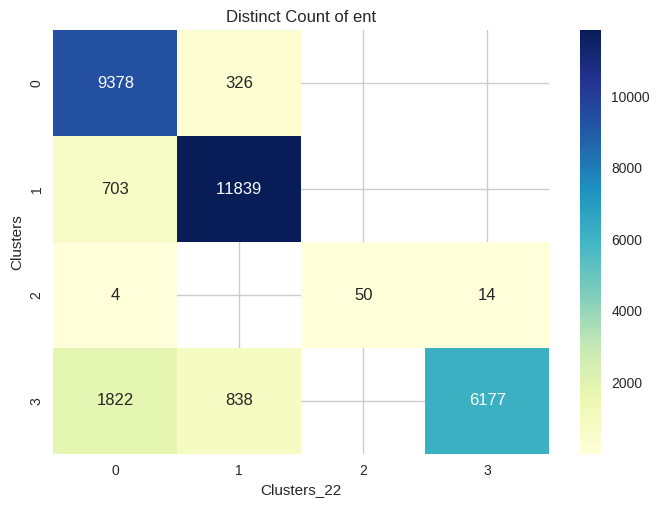

In [60]:
# Calculate the distinct count of 'ent' for each combination of 'Clusters' and 'Clusters_22'
heatmap_data = merged_df.groupby(['Clusters', 'Clusters_22'])['ent'].nunique().reset_index()

# Pivot the data to create a matrix suitable for heatmap
heatmap_matrix = heatmap_data.pivot('Clusters', 'Clusters_22', 'ent')

# Create the heatmap using seaborn
sns.heatmap(heatmap_matrix, annot=True,fmt='.0f', cmap='YlGnBu')

# Set the title and labels
plt.title('Distinct Count of ent')
plt.xlabel('Clusters_22')
plt.ylabel('Clusters')

# Show the heatmap
plt.show()